In [1]:
suppressMessages({library(Seurat)
    library(tidyverse)
    library(patchwork)})

Warning message:
“package ‘tibble’ was built under R version 4.0.5”
Warning message:
“package ‘tidyr’ was built under R version 4.0.3”
Warning message:
“package ‘purrr’ was built under R version 4.0.3”
Warning message:
“package ‘stringr’ was built under R version 4.0.5”


In [2]:
data_seurat <- readRDS("/SGRNJ06/randd/USER/cjj/celedev/zhushi/am/XCC.diff_PRO.rds")
data_seurat

An object of class Seurat 
15403 features across 23579 samples within 1 assay 
Active assay: RNA (15403 features, 2000 variable features)
 3 dimensional reductions calculated: pca, tsne, umap


        B_cells         CD8Teff            cDC1            cDC2     ClassicalMo 
           1073            8563              54             710            6911 
        Doublet         Naive_T              NK Non-classicalMo            pDCs 
             40            2180            1812            1615             154 
   Plasma_cells       Platelets Proliferating_T 
             38             357              72 

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


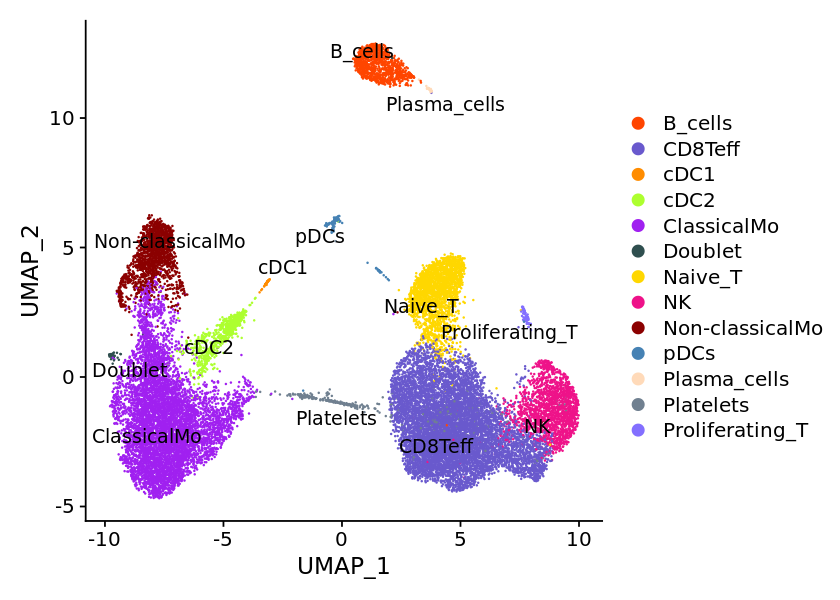

In [3]:
data_seurat$cell_type <- as.character(data_seurat$`RNA_snn_res.0.8`)
data_seurat$cell_type[data_seurat$cell_type %in% c(2)] = "Naive_T"
data_seurat$cell_type[data_seurat$cell_type %in% c(0,5,10)] = "CD8Teff"
data_seurat$cell_type[data_seurat$cell_type %in% c(3)] = "NK"
data_seurat$cell_type[data_seurat$cell_type %in% c(14)] = "Proliferating_T"
data_seurat$cell_type[data_seurat$cell_type %in% c(8)] = "B_cells"
data_seurat$cell_type[data_seurat$cell_type %in% c(17)] = "Plasma_cells"
data_seurat$cell_type[data_seurat$cell_type %in% c(13)] = "pDCs"
data_seurat$cell_type[data_seurat$cell_type %in% c(1,6,7,9)] = "ClassicalMo"
data_seurat$cell_type[data_seurat$cell_type %in% c(4)] = "Non-classicalMo"
data_seurat$cell_type[data_seurat$cell_type %in% c(15)] = "cDC1"
data_seurat$cell_type[data_seurat$cell_type %in% c(11)] = "cDC2"
data_seurat$cell_type[data_seurat$cell_type %in% c(12)] = "Platelets"
data_seurat$cell_type[data_seurat$cell_type %in% c(16)] = "Doublet"
table(data_seurat$cell_type)

options(repr.plot.width=7, repr.plot.height=5)
clustcol<-c("OrangeRed","SlateBlue3","DarkOrange","GreenYellow","Purple","DarkSlateGray","Gold","DeepPink2","Red4","#4682B4","#FFDAB9","#708090","#836FFF","#CDC673","#CD9B1D","#FF6EB4","#CDB5CD","DarkGreen","#008B8B","#43CD80","#483D8B","#66CD00","#CDC673","#CDAD00","#CD9B9B","#FF8247","#8B7355","#8B3A62","#68228B","#CDB7B5","#CD853F","#6B8E23","#696969","#7B68EE","#9F79EE","#B0C4DE","#7A378B","#66CDAA","#EEE8AA","#00FF00","#EEA2AD","#A0522D","#000080","#E9967A","#00CDCD","#8B4500","#DDA0DD","#EE9572","#EEE9E9","#8B1A1A","#8B8378","#EE9A49","#EECFA1","#8B4726","#8B8878","#EEB4B4","#C1CDCD","#8B7500","#0000FF","#EEEED1","#4F94CD","#6E8B3D","#B0E2FF","#76EE00","#A2B5CD","#548B54","#BBFFFF","#B4EEB4","#00C5CD","#008B8B","#7FFFD4","#8EE5EE","#43CD80","#68838B","#00FF00","#B9D3EE","#9ACD32","#00688B","#FFEC8B","#1C86EE","#CDCD00","#473C8B","#FFB90F","#EED5D2","#CD5555","#CDC9A5","#FFE7BA","#FFDAB9","#CD661D","#CDC5BF","#FF8C69","#8A2BE2","#CD8500","#B03060","#FF6347","#FF7F50","#CD0000","#F4A460","#FFB5C5","#DAA520","#CD6889","#32CD32","#FF00FF","#2E8B57","#CD96CD","#48D1CC","#9B30FF","#1E90FF","#CDB5CD","#191970","#E8E8E8","#FFDAB9")
DimPlot(data_seurat,group.by = "cell_type",cols = clustcol,label = T,repel = T)

#ggsave(paste0(outdir,"cell_type.pdf"),width = 9,height = 6)

In [4]:
table(data_seurat$cell_type,data_seurat$orig.ident)

                 
                  XCC_1_ZL XCC_2_ZL
  B_cells              576      497
  CD8Teff             4736     3827
  cDC1                  24       30
  cDC2                 373      337
  ClassicalMo         3500     3411
  Doublet               17       23
  Naive_T             1130     1050
  NK                  1013      799
  Non-classicalMo      782      833
  pDCs                  77       77
  Plasma_cells          19       19
  Platelets            187      170
  Proliferating_T       34       38

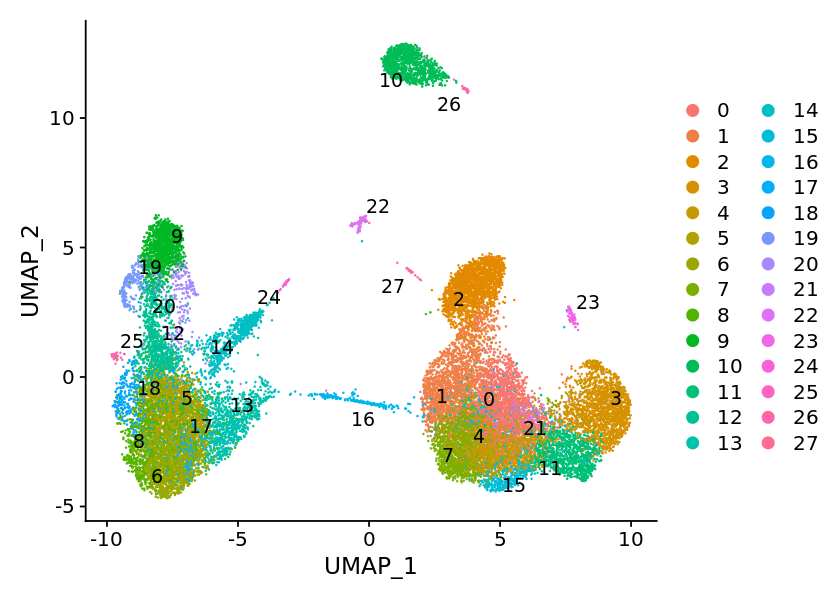

In [4]:
data_seurat <- FindClusters(data_seurat,resolution = 2,verbose = F)
DimPlot(data_seurat,group.by = "RNA_snn_res.2",label = T,repel = T)

In [5]:
# subcluster
data_subcluster_T <- subset(data_seurat, subset = cell_type %in% c("Naive_T","CD8Teff","NK","Proliferating_T"))
data_subcluster_T <- data_subcluster_T %>% 
  NormalizeData() %>%
  FindVariableFeatures(nfeatures = 2000) %>%
  ScaleData()%>% 
  #ScaleData(vars.to.regress = c("nCount_RNA", "percent.mt"))%>% 
  RunPCA(verbose =F) %>% 
  RunTSNE(reduction = "pca",dims=1:20, do.fast = TRUE, check_duplicates = FALSE, verbose = F) %>%
  RunUMAP(reduction = "pca",dims=1:20,verbose = F) %>%
  FindNeighbors(reduction = "pca", dims = 1:20,verbose = F) %>%
  FindClusters(resolution = seq(0.1,2,0.1),verbose = F)

Centering and scaling data matrix

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


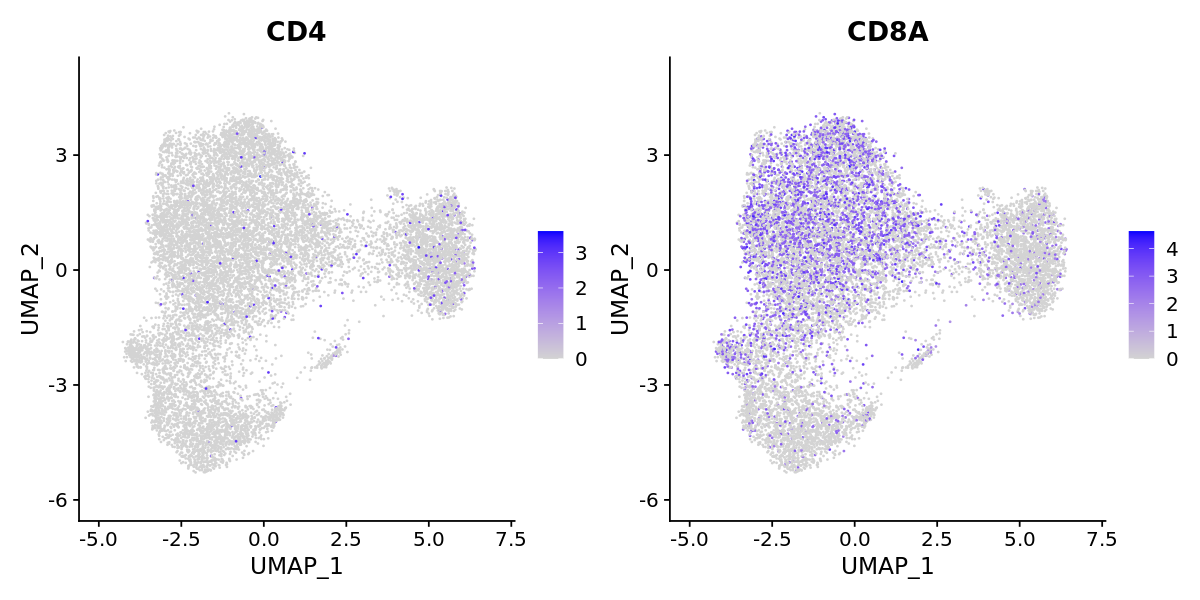

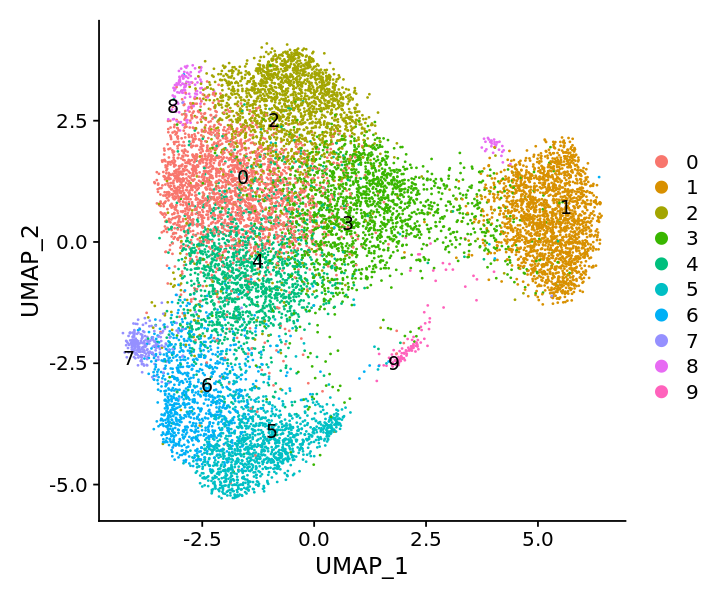

In [6]:
options(repr.plot.width=10, repr.plot.height=5)
FeaturePlot(data_subcluster_T,c("CD4","CD8A"))
options(repr.plot.width=6, repr.plot.height=5)
DimPlot(data_subcluster_T,group.by = "RNA_snn_res.1",label = T,repel = T)

In [7]:
# findmarkers 
Idents(data_subcluster_T) <- data_subcluster_T$`RNA_snn_res.1`
cluster_markers <- FindAllMarkers(data_subcluster_T)
cluster_markers <- split(cluster_markers, cluster_markers$cluster)
cluster_markers_out <- sapply(names(cluster_markers),function(x){write.table(cluster_markers[[x]][,c(7,1:6)],
                                               paste0("../data/2022-06-22_T_subcluster/degs_clusters/",x,".xls"),sep="\t",quote = F,row.names = F)})

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9



In [8]:
write.table(t(as.data.frame(table(data_subcluster_T$orig.ident,data_subcluster_T$`RNA_snn_res.1`)) %>% spread(Var2, Freq) ),
         paste0("../data/2022-06-22_T_subcluster/sample_cluster.xls"),quote=F,sep="\t",col.names=F)
table(data_subcluster_T$orig.ident,data_subcluster_T$`RNA_snn_res.1`)

          
              0    1    2    3    4    5    6    7    8    9
  XCC_1_ZL 1366 1011 1092  974  945  696  549  124  105   51
  XCC_2_ZL 1031 1000  898  891  714  539  436  111   40   54

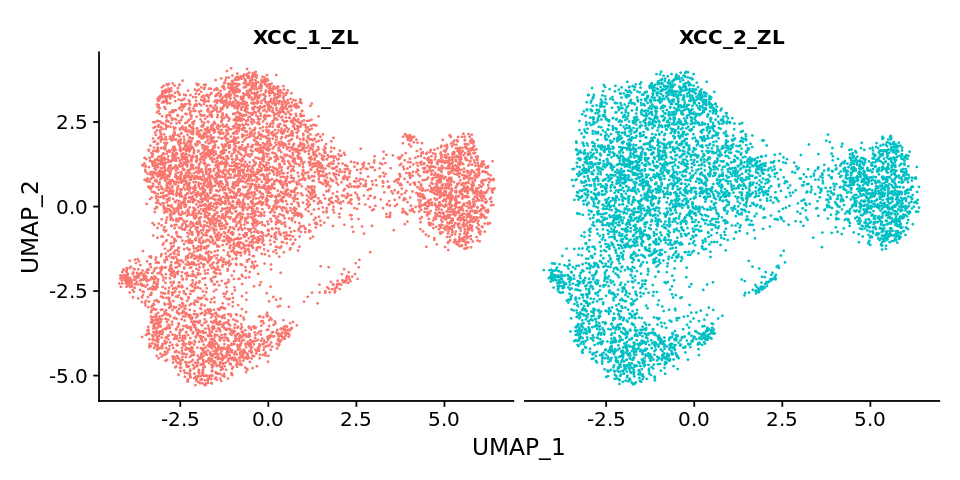

In [9]:
options(repr.plot.width=8, repr.plot.height=4)
DimPlot(data_subcluster_T, group.by = "orig.ident", split.by = "orig.ident", ncol = 2) + NoLegend()

In [10]:
data_subcluster_T$seurat_clusters <- as.character(data_subcluster_T$`RNA_snn_res.1`)
saveRDS(data_subcluster_T, "../data/2022-06-22_T_subcluster/seurat_subcluster.rds")
saveRDS(data_seurat, "../data/2022-06-22_T_subcluster/seurat.rds")

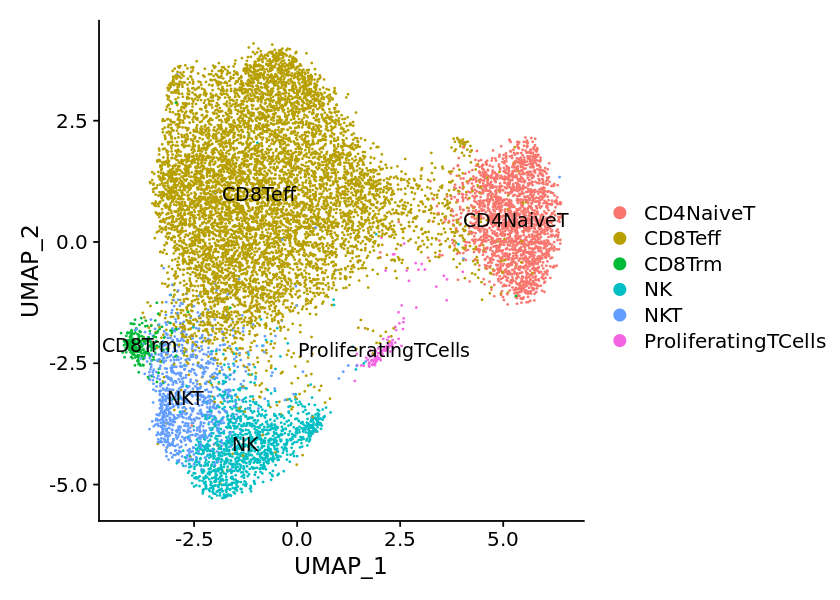

In [12]:
# cell type
data_subcluster_T$cell_type <- as.character(data_subcluster_T$RNA_snn_res.1)
data_subcluster_T$cell_type[data_subcluster_T$cell_type %in% c(1)] = "CD4NaiveT"
data_subcluster_T$cell_type[data_subcluster_T$cell_type %in% c(0,2,3,4,8)] = "CD8Teff"
data_subcluster_T$cell_type[data_subcluster_T$cell_type %in% c(5)] = "NK" 
data_subcluster_T$cell_type[data_subcluster_T$cell_type %in% c(9)] = "ProliferatingTCells" 
data_subcluster_T$cell_type[data_subcluster_T$cell_type %in% c(7)] = "CD8Trm" 
data_subcluster_T$cell_type[data_subcluster_T$cell_type %in% c(6)] = "NKT" 
options(repr.plot.width=7, repr.plot.height=5)
DimPlot(data_subcluster_T,group.by = "cell_type",label = T)

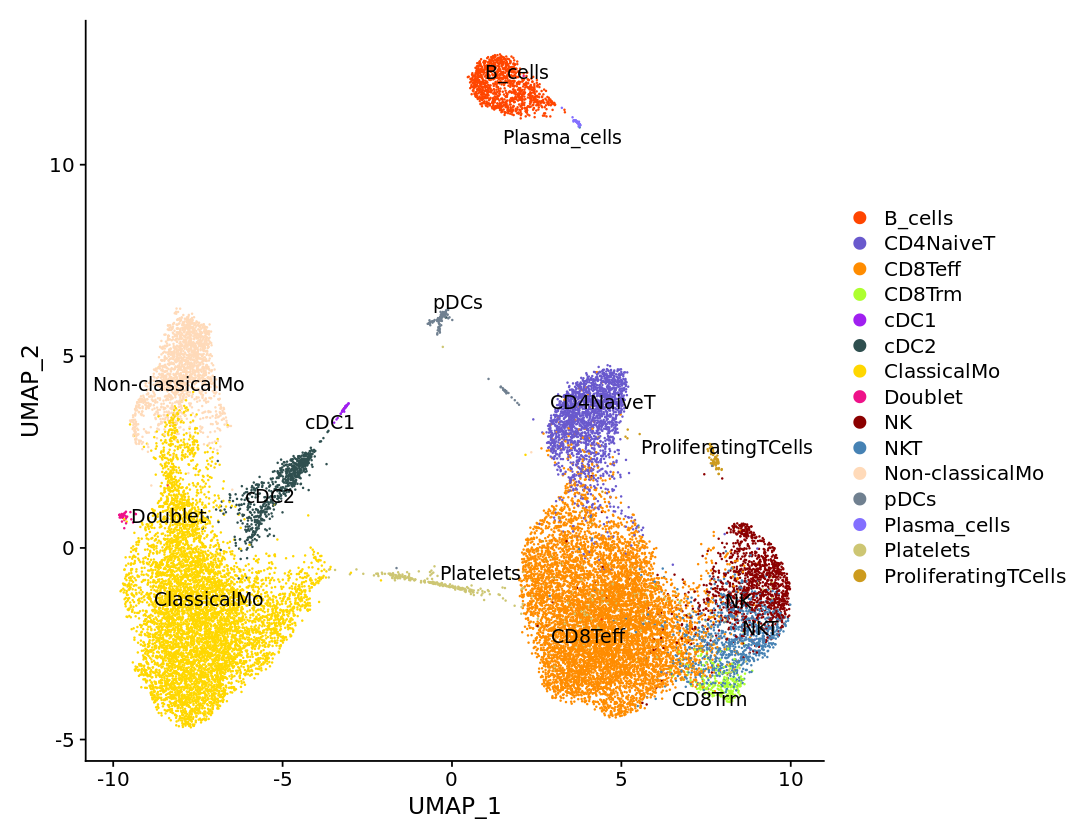

In [17]:
data_seurat$cell_type_v1 <- as.character(data_seurat$cell_type)
data_seurat$cell_type[ colnames(data_seurat) %in% colnames(data_subcluster_T)[ data_subcluster_T$cell_type == "CD4NaiveT"]] = "CD4NaiveT"
data_seurat$cell_type[ colnames(data_seurat) %in% colnames(data_subcluster_T)[ data_subcluster_T$cell_type == "CD8Teff"]] = "CD8Teff"
data_seurat$cell_type[ colnames(data_seurat) %in% colnames(data_subcluster_T)[ data_subcluster_T$cell_type == "NK"]] = "NK"
data_seurat$cell_type[ colnames(data_seurat) %in% colnames(data_subcluster_T)[ data_subcluster_T$cell_type == "ProliferatingTCells"]] = "ProliferatingTCells"
data_seurat$cell_type[ colnames(data_seurat) %in% colnames(data_subcluster_T)[ data_subcluster_T$cell_type == "CD8Trm"]] = "CD8Trm"
data_seurat$cell_type[ colnames(data_seurat) %in% colnames(data_subcluster_T)[ data_subcluster_T$cell_type == "NKT"]] = "NKT"

options(repr.plot.width=9, repr.plot.height=7)
clustcol<-c("OrangeRed","SlateBlue3","DarkOrange","GreenYellow","Purple","DarkSlateGray","Gold","DeepPink2","Red4","#4682B4","#FFDAB9","#708090","#836FFF","#CDC673","#CD9B1D","#FF6EB4","#CDB5CD","DarkGreen","#008B8B","#43CD80","#483D8B","#66CD00","#CDC673","#CDAD00","#CD9B9B","#FF8247","#8B7355","#8B3A62","#68228B","#CDB7B5","#CD853F","#6B8E23","#696969","#7B68EE","#9F79EE","#B0C4DE","#7A378B","#66CDAA","#EEE8AA","#00FF00","#EEA2AD","#A0522D","#000080","#E9967A","#00CDCD","#8B4500","#DDA0DD","#EE9572","#EEE9E9","#8B1A1A","#8B8378","#EE9A49","#EECFA1","#8B4726","#8B8878","#EEB4B4","#C1CDCD","#8B7500","#0000FF","#EEEED1","#4F94CD","#6E8B3D","#B0E2FF","#76EE00","#A2B5CD","#548B54","#BBFFFF","#B4EEB4","#00C5CD","#008B8B","#7FFFD4","#8EE5EE","#43CD80","#68838B","#00FF00","#B9D3EE","#9ACD32","#00688B","#FFEC8B","#1C86EE","#CDCD00","#473C8B","#FFB90F","#EED5D2","#CD5555","#CDC9A5","#FFE7BA","#FFDAB9","#CD661D","#CDC5BF","#FF8C69","#8A2BE2","#CD8500","#B03060","#FF6347","#FF7F50","#CD0000","#F4A460","#FFB5C5","#DAA520","#CD6889","#32CD32","#FF00FF","#2E8B57","#CD96CD","#48D1CC","#9B30FF","#1E90FF","#CDB5CD","#191970","#E8E8E8","#FFDAB9")
DimPlot(data_seurat,group.by = "cell_type",cols = clustcol,label = T,repel = T)

In [21]:
table(data_seurat$cell_type)
table(data_subcluster_T$cell_type)


            B_cells           CD4NaiveT             CD8Teff              CD8Trm 
               1073                2011                8056                 235 
               cDC1                cDC2         ClassicalMo             Doublet 
                 54                 710                6911                  40 
                 NK                 NKT     Non-classicalMo                pDCs 
               1235                 985                1615                 154 
       Plasma_cells           Platelets ProliferatingTCells 
                 38                 357                 105 


          CD4NaiveT             CD8Teff              CD8Trm                  NK 
               2011                8056                 235                1235 
                NKT ProliferatingTCells 
                985                 105 

In [ ]:
# 2022-06-24 update 

In [2]:
data_seurat <- readRDS("../data/2022-06-22_T_subcluster/seurat.rds")
data_subcluster_T <- readRDS("../data/2022-06-22_T_subcluster/seurat_subcluster.rds")


        B_cells         CD8Teff            cDC1            cDC2     ClassicalMo 
           1073            8563              54             710            6911 
        Doublet         Naive_T              NK Non-classicalMo            pDCs 
             40            2180            1812            1615             154 
   Plasma_cells       Platelets Proliferating_T 
             38             357              72 

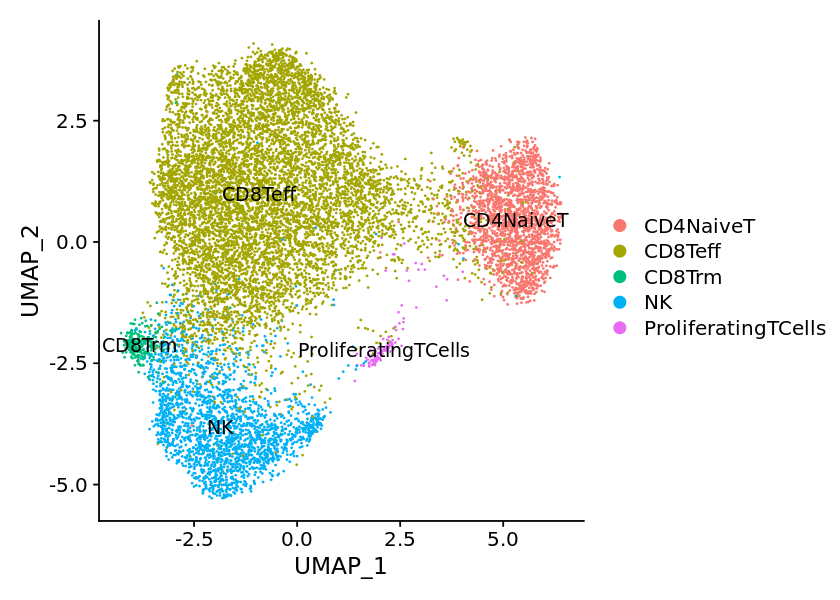

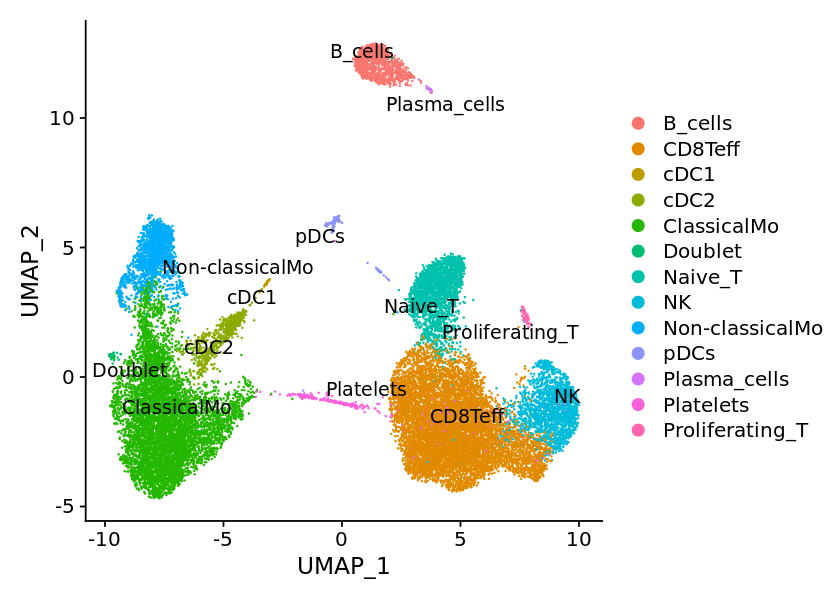

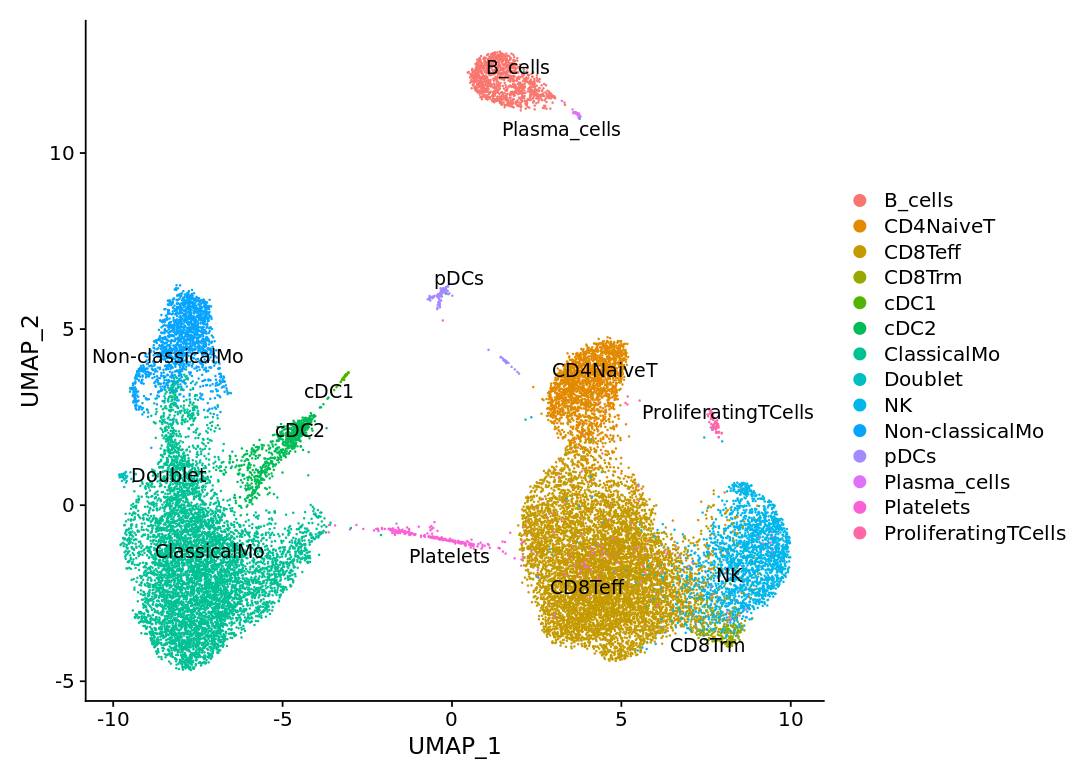

In [4]:
# cell type
data_subcluster_T$cell_type <- as.character(data_subcluster_T$RNA_snn_res.1)
data_subcluster_T$cell_type[data_subcluster_T$cell_type %in% c(1)] = "CD4NaiveT"
data_subcluster_T$cell_type[data_subcluster_T$cell_type %in% c(0,2,3,4,8)] = "CD8Teff"
data_subcluster_T$cell_type[data_subcluster_T$cell_type %in% c(5,6)] = "NK" 
data_subcluster_T$cell_type[data_subcluster_T$cell_type %in% c(9)] = "ProliferatingTCells" 
data_subcluster_T$cell_type[data_subcluster_T$cell_type %in% c(7)] = "CD8Trm" 
options(repr.plot.width=7, repr.plot.height=5)
DimPlot(data_subcluster_T,group.by = "cell_type",label = T)


data_seurat$cell_type <- as.character(data_seurat$`RNA_snn_res.0.8`)
data_seurat$cell_type[data_seurat$cell_type %in% c(2)] = "Naive_T"
data_seurat$cell_type[data_seurat$cell_type %in% c(0,5,10)] = "CD8Teff"
data_seurat$cell_type[data_seurat$cell_type %in% c(3)] = "NK"
data_seurat$cell_type[data_seurat$cell_type %in% c(14)] = "Proliferating_T"
data_seurat$cell_type[data_seurat$cell_type %in% c(8)] = "B_cells"
data_seurat$cell_type[data_seurat$cell_type %in% c(17)] = "Plasma_cells"
data_seurat$cell_type[data_seurat$cell_type %in% c(13)] = "pDCs"
data_seurat$cell_type[data_seurat$cell_type %in% c(1,6,7,9)] = "ClassicalMo"
data_seurat$cell_type[data_seurat$cell_type %in% c(4)] = "Non-classicalMo"
data_seurat$cell_type[data_seurat$cell_type %in% c(15)] = "cDC1"
data_seurat$cell_type[data_seurat$cell_type %in% c(11)] = "cDC2"
data_seurat$cell_type[data_seurat$cell_type %in% c(12)] = "Platelets"
data_seurat$cell_type[data_seurat$cell_type %in% c(16)] = "Doublet"
table(data_seurat$cell_type)

options(repr.plot.width=7, repr.plot.height=5)
#clustcol<-c("OrangeRed","SlateBlue3","DarkOrange","GreenYellow","Purple","DarkSlateGray","Gold","DeepPink2","Red4","#4682B4","#FFDAB9","#708090","#836FFF","#CDC673","#CD9B1D","#FF6EB4","#CDB5CD","DarkGreen","#008B8B","#43CD80","#483D8B","#66CD00","#CDC673","#CDAD00","#CD9B9B","#FF8247","#8B7355","#8B3A62","#68228B","#CDB7B5","#CD853F","#6B8E23","#696969","#7B68EE","#9F79EE","#B0C4DE","#7A378B","#66CDAA","#EEE8AA","#00FF00","#EEA2AD","#A0522D","#000080","#E9967A","#00CDCD","#8B4500","#DDA0DD","#EE9572","#EEE9E9","#8B1A1A","#8B8378","#EE9A49","#EECFA1","#8B4726","#8B8878","#EEB4B4","#C1CDCD","#8B7500","#0000FF","#EEEED1","#4F94CD","#6E8B3D","#B0E2FF","#76EE00","#A2B5CD","#548B54","#BBFFFF","#B4EEB4","#00C5CD","#008B8B","#7FFFD4","#8EE5EE","#43CD80","#68838B","#00FF00","#B9D3EE","#9ACD32","#00688B","#FFEC8B","#1C86EE","#CDCD00","#473C8B","#FFB90F","#EED5D2","#CD5555","#CDC9A5","#FFE7BA","#FFDAB9","#CD661D","#CDC5BF","#FF8C69","#8A2BE2","#CD8500","#B03060","#FF6347","#FF7F50","#CD0000","#F4A460","#FFB5C5","#DAA520","#CD6889","#32CD32","#FF00FF","#2E8B57","#CD96CD","#48D1CC","#9B30FF","#1E90FF","#CDB5CD","#191970","#E8E8E8","#FFDAB9")
DimPlot(data_seurat,group.by = "cell_type",label = T,repel = T)

data_seurat$cell_type_v1 <- as.character(data_seurat$cell_type)
data_seurat$cell_type[ colnames(data_seurat) %in% colnames(data_subcluster_T)[ data_subcluster_T$cell_type == "CD4NaiveT"]] = "CD4NaiveT"
data_seurat$cell_type[ colnames(data_seurat) %in% colnames(data_subcluster_T)[ data_subcluster_T$cell_type == "CD8Teff"]] = "CD8Teff"
data_seurat$cell_type[ colnames(data_seurat) %in% colnames(data_subcluster_T)[ data_subcluster_T$cell_type == "NK"]] = "NK"
data_seurat$cell_type[ colnames(data_seurat) %in% colnames(data_subcluster_T)[ data_subcluster_T$cell_type == "ProliferatingTCells"]] = "ProliferatingTCells"
data_seurat$cell_type[ colnames(data_seurat) %in% colnames(data_subcluster_T)[ data_subcluster_T$cell_type == "CD8Trm"]] = "CD8Trm"

options(repr.plot.width=9, repr.plot.height=6.5)
#clustcol<-c("OrangeRed","SlateBlue3","DarkOrange","GreenYellow","Purple","DarkSlateGray","Gold","DeepPink2","Red4","#4682B4","#FFDAB9","#708090","#836FFF","#CDC673","#CD9B1D","#FF6EB4","#CDB5CD","DarkGreen","#008B8B","#43CD80","#483D8B","#66CD00","#CDC673","#CDAD00","#CD9B9B","#FF8247","#8B7355","#8B3A62","#68228B","#CDB7B5","#CD853F","#6B8E23","#696969","#7B68EE","#9F79EE","#B0C4DE","#7A378B","#66CDAA","#EEE8AA","#00FF00","#EEA2AD","#A0522D","#000080","#E9967A","#00CDCD","#8B4500","#DDA0DD","#EE9572","#EEE9E9","#8B1A1A","#8B8378","#EE9A49","#EECFA1","#8B4726","#8B8878","#EEB4B4","#C1CDCD","#8B7500","#0000FF","#EEEED1","#4F94CD","#6E8B3D","#B0E2FF","#76EE00","#A2B5CD","#548B54","#BBFFFF","#B4EEB4","#00C5CD","#008B8B","#7FFFD4","#8EE5EE","#43CD80","#68838B","#00FF00","#B9D3EE","#9ACD32","#00688B","#FFEC8B","#1C86EE","#CDCD00","#473C8B","#FFB90F","#EED5D2","#CD5555","#CDC9A5","#FFE7BA","#FFDAB9","#CD661D","#CDC5BF","#FF8C69","#8A2BE2","#CD8500","#B03060","#FF6347","#FF7F50","#CD0000","#F4A460","#FFB5C5","#DAA520","#CD6889","#32CD32","#FF00FF","#2E8B57","#CD96CD","#48D1CC","#9B30FF","#1E90FF","#CDB5CD","#191970","#E8E8E8","#FFDAB9")
DimPlot(data_seurat,group.by = "cell_type",label = T,repel = T)

[1] TRUE

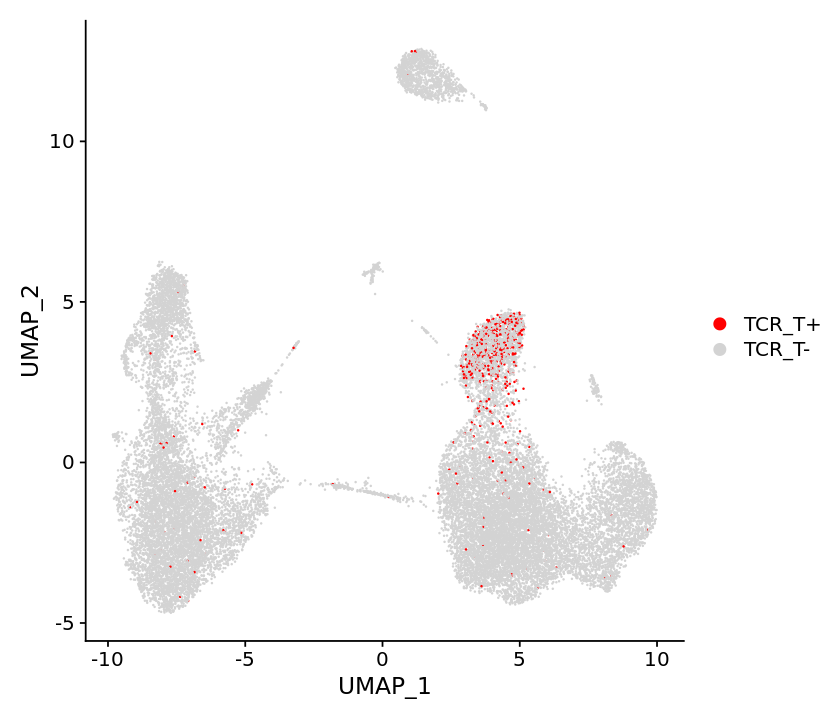

In [4]:
# fj
ts_name <- list.files("/SGRNJ06/randd/PROJECT/RD20102301_DZH/P21102201_TCR_T/20220518_otsu/")
ts_name <- ts_name[grep("TCR",ts_name)]

function_read_fj_csv <- function(name){
    fj <- read.csv(paste0("/SGRNJ06/randd/PROJECT/RD20102301_DZH/P21102201_TCR_T/20220518_otsu/",name,"/07.analysis_virus/",name,"_UMI_tsne.csv"))
    bc_prefix = gsub("TCR_T","ZL",name)
    fj$barcode <- paste0(bc_prefix,"_",fj$barcode)
    return(fj)
}
ts <- do.call(rbind,lapply(ts_name,function_read_fj_csv))

identical(colnames(data_seurat),ts$barcode)   
    
data_seurat$TCR_T_UMI <- ts$sum_UMI
data_seurat$TCR_T_status <-  ifelse(data_seurat$TCR_T_UMI ==0, "TCR_T-", "TCR_T+")
data_seurat$TCR_T_status <- factor(data_seurat$TCR_T_status,levels = c("TCR_T+","TCR_T-"))


options(repr.plot.width=7, repr.plot.height=6)
DimPlot(data_seurat,group.by = "TCR_T_status",cols = c("red","lightgrey"))

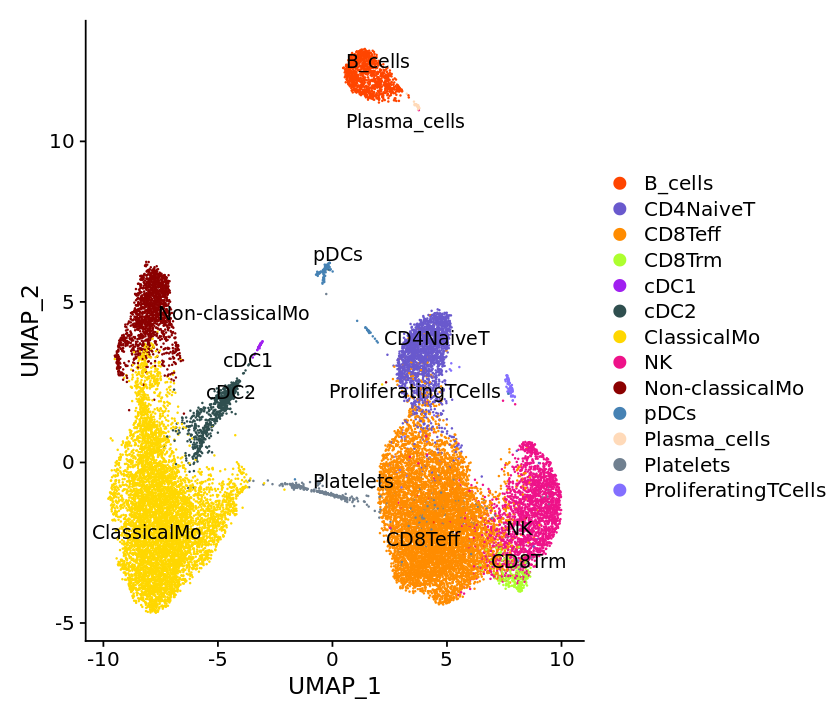

In [5]:
data_seurat <- subset(data_seurat, subset = cell_type != "Doublet")
DimPlot(data_seurat,group.by = "cell_type",cols = clustcol,label = T,repel = T)

In [6]:
outdir <- "../results/2022-06-24_ts/"
dir.create(paste0(outdir,"TCR_T_stat/"))

function_TCR_T_stat_by_sample <- function(sample_id){
  data_sub <- subset(data_seurat,subset = orig.ident== sample_id & cell_type != "Doublet")   
  p1 <- DimPlot(data_sub,group.by = "TCR_T_status",cols = c("red","lightgrey"))+ggtitle(paste(sample_id,": TCR_T_status"))
  ggsave(paste0(outdir,"TCR_T_stat/",sample_id,"_TCR_T_status.png"),plot = p1 ,width = 7,height = 5)
  p2 <- DimPlot(data_sub,group.by = "cell_type",label = T,repel = T)+ggtitle(paste(sample_id,": cell_type"))
  ggsave(paste0(outdir,"TCR_T_stat/",sample_id,"_cell_type.png"),plot = p2, width = 9,height = 7)
    
  data_sub@meta.data %>%
    group_by(cell_type)%>%
    summarize(`Cell with TCR-T` = sum(TCR_T_UMI>0),
              CellNumber = length(TCR_T_UMI))%>%
    mutate(`Cell with TCR-T percent` = paste(100 * round(`Cell with TCR-T`/CellNumber,4),"%")) -> stat_df
  write.table(stat_df,paste0(outdir,"TCR_T_stat/",sample_id,"_stat.xls"),sep="\t",row.names = F) 
}
stat_out <- lapply(unique(data_seurat$orig.ident),function_TCR_T_stat_by_sample)

In [5]:
# subcluster
data_subcluster_T <- subset(data_seurat, subset = cell_type == "Naive_T")
data_subcluster_T <- data_subcluster_T %>% 
  NormalizeData() %>%
  FindVariableFeatures(nfeatures = 2000) %>%
  ScaleData()%>% 
  #ScaleData(vars.to.regress = c("nCount_RNA", "percent.mt"))%>% 
  RunPCA(verbose =F) %>% 
  RunTSNE(reduction = "pca",dims=1:20, do.fast = TRUE, check_duplicates = FALSE, verbose = F) %>%
  RunUMAP(reduction = "pca",dims=1:20,verbose = F) %>%
  FindNeighbors(reduction = "pca", dims = 1:20,verbose = F) %>%
  FindClusters(resolution = seq(0.1,2,0.1),verbose = F)

Centering and scaling data matrix

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


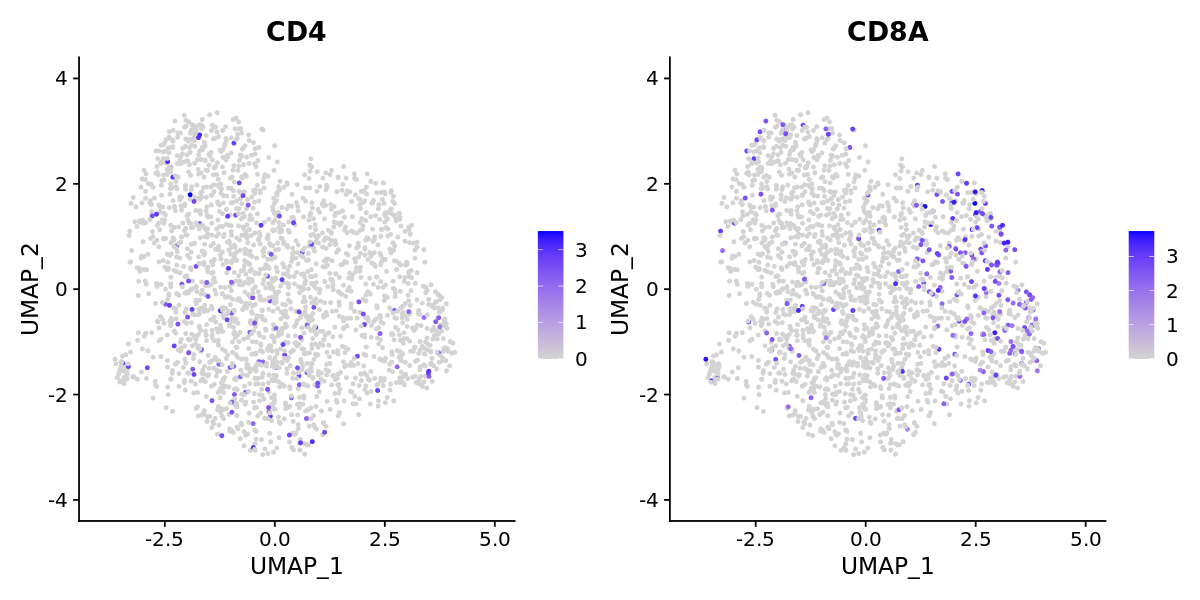

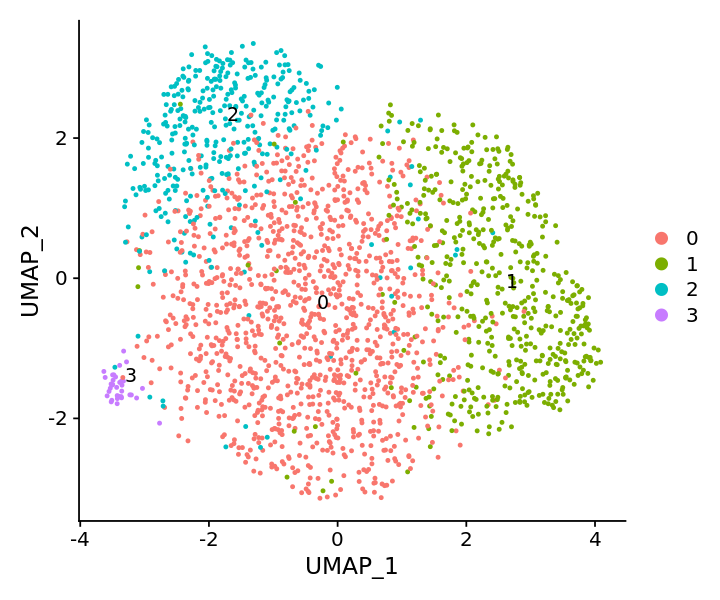

In [6]:
options(repr.plot.width=10, repr.plot.height=5)
FeaturePlot(data_subcluster_T,c("CD4","CD8A"))
options(repr.plot.width=6, repr.plot.height=5)
DimPlot(data_subcluster_T,group.by = "RNA_snn_res.0.6",label = T,repel = T)

In [7]:
# findmarkers 
Idents(data_subcluster_T) <- data_subcluster_T$`RNA_snn_res.0.6`
cluster_markers <- FindAllMarkers(data_subcluster_T)
cluster_markers <- split(cluster_markers, cluster_markers$cluster)
cluster_markers_out <- sapply(names(cluster_markers),function(x){write.table(cluster_markers[[x]][,c(7,1:6)],
                                               paste0("../data/2022-06-21_Naive_T_subcluster/degs_clusters/",x,".xls"),sep="\t",quote = F,row.names = F)})

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3



In [8]:
data_subcluster_T$seurat_clusters <- as.character(data_subcluster_T$`RNA_snn_res.0.6`)
saveRDS(data_subcluster_T, "../data/2022-06-21_Naive_T_subcluster/seurat_subcluster.rds")

In [2]:
(data_subcluster_T <- readRDS("../data/2022-06-21_T_subcluster/seurat_subcluster.rds"))

An object of class Seurat 
15403 features across 2180 samples within 1 assay 
Active assay: RNA (15403 features, 2000 variable features)
 3 dimensional reductions calculated: pca, tsne, umap

In [3]:
write.table(t(as.data.frame(table(data_subcluster_T$orig.ident,data_subcluster_T$`RNA_snn_res.0.6`)) %>% spread(Var2, Freq) ),
         paste0("../data/2022-06-21_Naive_T_subcluster/sample_cluster.xls"),quote=F,sep="\t",col.names=F)
table(data_subcluster_T$orig.ident,data_subcluster_T$`RNA_snn_res.0.6`)

          
             0   1   2   3
  XCC_1_ZL 631 278 192  29
  XCC_2_ZL 592 275 178   5

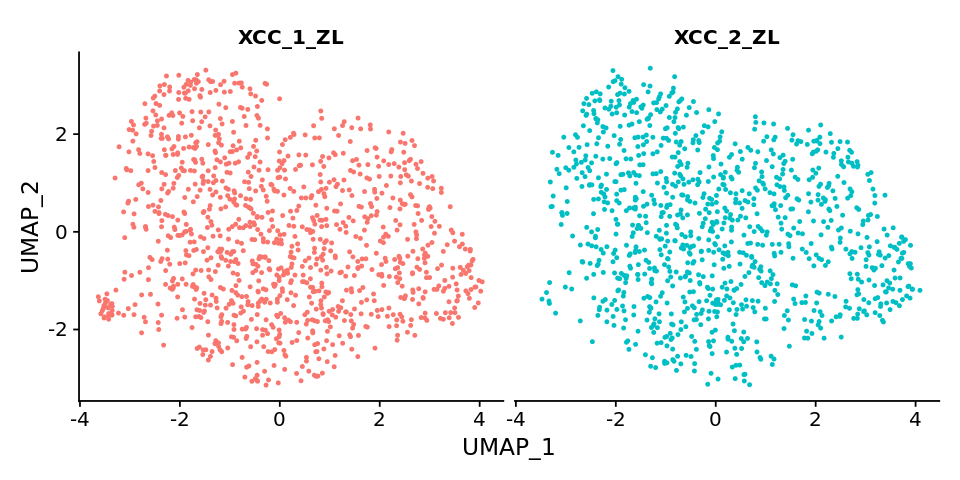

In [4]:
options(repr.plot.width=8, repr.plot.height=4)
DimPlot(data_subcluster_T, group.by = "orig.ident", split.by = "orig.ident", ncol = 2) + NoLegend()